# <머신러닝 프로세스>
### 1. DATA SET 분할 
- 학습 데이터를 랜덤으로 train/validation으로 구분하고 test도 준비

### 2. 데이터 전처리 
- 변수의 정규화, 범주자료 원핫인코딩(분류에 쓸 수 있게 숫자료 변환)
- minmax, standard가 주로 쓰임
- 

### 3. 모델 적용 
- 회귀 문제, 분류 문제, 비지도 학습

### 4. 하이퍼 파라미터 탐색 및 결정
- 테스트 셋으로 성능을 평가
- 하이퍼파라미타 탐색(모델튜닝)을 위한 방법으로 사이킷런에서는 그리드 탐색과 랜덤 탐색이 있음

### 5. 모델 평가
- 정확도(accuracy), 민감도(재현율), 특이도, 정밀도, F1 score 등 다양한 지표 활용
- 회귀에서는 R-square, RMSE가 있음 

# 
# 머신러닝 맛보기 1:분류 문제

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:\\Users\\user\\빅분기 실기\\[1]BigData_data_최종본(0910)\\breast-cancer-wisconsin.csv')

In [3]:
data[['Class']].value_counts()

Class
0        444
1        239
dtype: int64

In [4]:
data.shape

(683, 11)

In [5]:
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [6]:
# 방법 1 특성 이름으로 데이터 셋 나누기
X1 = data[['Clump_Thickness'	,'Cell_Size'	,'Cell_Shape',	'Marginal_Adhesion',	'Single_Epithelial_Cell_Size'	,'Bare_Nuclei',	'Bland_Chromatin',	'Normal_Nucleoli',	'Mitoses']]

# 방법 2 특성 위치값으로 데이터 셋 나누기
X2= data[data.columns[1:len(data.columns)-1]]

# 방법 3 loc 함수로 데이터 셋 나누기
X3= data.loc[:,data.columns[1:len(data.columns)-1]]

In [7]:
print(X1.shape,X2.shape,X3.shape)

(683, 9) (683, 9) (683, 9)


In [8]:
y= data[["Class"]]
print(y.shape)

(683, 1)


        
train test 셋 나누기 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y , stratify=y , random_state=42) # 분류문제에서는 stratify=y하는 게 좋음. 의미는 나눌 때 범주 비율에 맞게 나누라는 의미

In [10]:
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


정규화

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_MM = MinMaxScaler()
scaler_S = StandardScaler()

scaler_MM.fit(X_train)
X_train_MM = scaler_MM.transform(X_train)

scaler_S.fit(X_train)
X_train_S = scaler_S.transform(X_train)

In [12]:
pd.DataFrame(X_train_MM).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
pd.DataFrame(X_train_S).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-1.548241e-16,-1.543904e-16,-1.353084e-16,1.149254e-16,5.767956e-17,1.674008e-16,-2.775558e-17,-3.642919e-17,6.938894e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


In [14]:
#테스트 데이터 정규화
X_test_MM = scaler_MM.transform(X_test)
X_test_S = scaler_S.transform(X_test)

In [15]:
pd.DataFrame(X_test_MM).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


모델 학습

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_MM, y_train)
pred_train = model.predict(X_train_MM)
model.score(X_train_MM, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.97265625

- 모델 훈련 model.fit(x,y)
- 모델 예측(범주) model.predict(x)
- 모델 예측(확률) model.predict_proba(x)
- 모델정확도 model.score(x,y)

In [17]:
pred_test =model.predict(X_test_MM)
model.score(X_test_MM, y_test)

0.9590643274853801

- 혼동행렬
    
 혼동행렬을 통해 예측 y_train와 실제y_train를 비교

In [18]:
from sklearn.metrics import confusion_matrix
cofusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차 행렬: \n",cofusion_train) # 333중 328, 179중 170 맞춤 

훈련데이터 오차 행렬: 
 [[328   5]
 [  9 170]]


In [19]:
cofusion_test = confusion_matrix(y_test, pred_test)
print("훈련데이터 오차 행렬: \n",cofusion_test)

훈련데이터 오차 행렬: 
 [[106   5]
 [  2  58]]


- report

In [20]:
from sklearn.metrics import classification_report

cfre_train = classification_report(y_train, pred_train)
print("분류예측 레포트: \n",cfre_train)

분류예측 레포트: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [21]:
cfre_test = classification_report(y_test, pred_test)
print("분류예측 레포트: \n",cfre_test)

분류예측 레포트: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



- ROC 평가지표

50%는 최하, 100%에 가까울수록 좋은 모델

In [22]:
from sklearn.metrics import roc_curve,auc
from sklearn import metrics

false_positive_rate, true_positive_rate , thresholds = roc_curve(y_test, model.decision_function(X_test_MM))
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(X_test_MM))
roc_auc

0.9923423423423423

- ROC Curve

In [23]:
import matplotlib.pyplot as plt

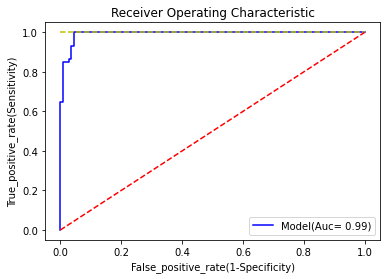

In [24]:
plt.title("Receiver Operating Characteristic")

plt.xlabel("False_positive_rate(1-Specificity)")
plt.ylabel("True_positive_rate(Sensitivity)")
plt.plot(false_positive_rate, true_positive_rate,'b', label= 'Model(Auc= {:0.2f})'.format(roc_auc))
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')
plt.legend(loc= 'best')
plt.show()

병합 및 저장

In [25]:
false_positive_rate

array([0.        , 0.        , 0.        , 0.00900901, 0.00900901,
       0.02702703, 0.02702703, 0.03603604, 0.03603604, 0.04504505,
       0.04504505, 0.17117117, 0.18918919, 0.23423423, 0.25225225,
       0.27027027, 0.2972973 , 0.30630631, 0.32432432, 0.33333333,
       0.35135135, 0.36036036, 0.37837838, 0.3963964 , 0.43243243,
       0.45045045, 0.47747748, 0.52252252, 0.54954955, 0.55855856,
       0.57657658, 0.58558559, 0.62162162, 0.63963964, 0.69369369,
       0.73873874, 0.77477477, 0.79279279, 0.8018018 , 0.82882883,
       0.86486486, 0.89189189, 0.92792793, 0.99099099, 1.        ])

In [26]:
true_positive_rate

array([0.        , 0.01666667, 0.65      , 0.65      , 0.85      ,
       0.85      , 0.86666667, 0.86666667, 0.93333333, 0.93333333,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [27]:
prob_train = model.predict_proba(X_train_MM)
y_train[['y_pred']] = pred_train
y_train[['y_prob0','y_prob1']] = prob_train
y_train

<ipython-input-27-30f0b4a9dd3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[['y_pred']] = pred_train
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-27-30f0b4a9dd3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Class,y_pred,y_prob0,y_prob1
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569
269,0,0,0.988880,0.011120
56,1,1,0.203161,0.796839
...,...,...,...,...
515,1,1,0.021270,0.978730
216,1,0,0.895961,0.104039
312,1,1,0.113440,0.886560
11,0,0,0.987405,0.012595


In [28]:
prob_test = model.predict_proba(X_test_MM)
y_test[['y_pred']] = pred_test
y_test[['y_prob0','y_prob1']] = prob_test
y_test

<ipython-input-28-75d5d25eee37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[['y_pred']] = pred_test
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-28-75d5d25eee37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Class,y_pred,y_prob0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


In [29]:
Total_test= pd.concat([X_test,y_test],axis=1)

In [30]:
Total_test.to_csv("new classification.csv")

# 
# 머신러닝 맛보기 2:회귀 문제

In [31]:
import pandas as pd
data =pd.read_csv('c:\\Users\\user\\빅분기 실기\\[1]BigData_data_최종본(0910)\\house_price.csv')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [32]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

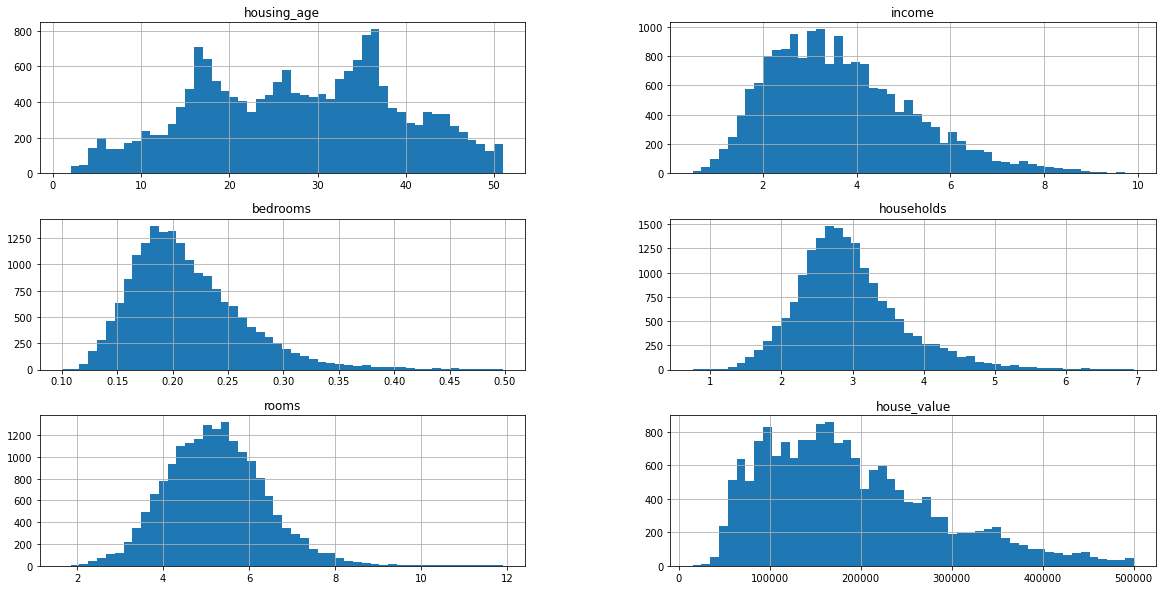

In [33]:
data.hist(bins=50,figsize=(20,10))

##
데이터 나누기


In [34]:
X = data[data.columns[:len(data.columns)-1]]
y = data[['house_value']]

In [35]:
X.shape, y.shape

((17689, 5), (17689, 1))

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [37]:
y_train.mean(), y_test.mean()

(house_value    189260.967812
 dtype: float64,
 house_value    188391.001357
 dtype: float64)

###
정규화

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_MM=  MinMaxScaler()
scaler_S=  StandardScaler()

scaler_MM.fit(X_train)

X_train_MM = scaler_MM.transform(X_train)
X_test_MM = scaler_MM.transform(X_test)

scaler_S.fit(X_train)

X_train_S = scaler_S.transform(X_train)
X_test_S = scaler_S.transform(X_test)

In [39]:
pd.DataFrame(X_train_MM).describe()

,0,1,2,3,4
count,13266.000000,13266.000000,13266.000000,13266.000000,13266.000000
mean,0.526774,0.337157,0.284682,0.357657,0.335256
std,0.224853,0.161972,0.129011,0.118029,0.117614
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.217083,0.194600,0.280091,0.254470
50%,0.540000,0.313983,0.261866,0.342512,0.330405
75%,0.700000,0.435921,0.352555,0.416829,0.405879
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
pd.DataFrame(X_train_S).describe()

,0,1,2,3,4
count,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04
mean,5.615556e-18,1.588508e-16,7.827508e-16,-1.103026e-16,-3.708213e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.342832e+00,-2.081653e+00,-2.206729e+00,-3.030366e+00,-2.850578e+00
25%,-8.306782e-01,-7.413514e-01,-6.982778e-01,-6.572081e-01,-6.868994e-01
50%,5.882409e-02,-1.430799e-01,-1.768626e-01,-1.283229e-01,-4.124140e-02
75%,7.704259e-01,6.097813e-01,5.261181e-01,5.013487e-01,6.004859e-01
max,2.104679e+00,4.092478e+00,5.544819e+00,5.442457e+00,5.652123e+00


In [41]:
pd.DataFrame(X_test_MM).describe()

,0,1,2,3,4
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.529984,0.337189,0.284061,0.362482,0.338222
std,0.227852,0.163047,0.127044,0.122663,0.119826
min,0.000000,0.000000,0.044099,0.051525,-0.023437
25%,0.340000,0.213011,0.194452,0.281143,0.254633
50%,0.540000,0.314536,0.260169,0.344791,0.331819
75%,0.700000,0.433109,0.351367,0.424120,0.410090
max,1.000000,0.992462,0.975243,1.011026,0.998799


###
모델 학습

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_MM, y_train)
pred_train = model.predict(X_train_MM)
print("R-squared = {:0.2f}".format(model.score(X_train_MM, y_train)))

R-squared = 0.57


In [43]:
pred_test = model.predict(X_test_MM)
print("R-squared = {:0.2f}".format(model.score(X_test_MM, y_test)))

R-squared = 0.58


- RMSE

평균제곱오차

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error
MSE =mean_squared_error(y_test, pred_test)
print("RMSE = {:0.2f}".format(np.sqrt(MSE)))

RMSE = 61763.85


- MAE

평균 절댓값 오차

In [45]:
from sklearn.metrics import mean_absolute_error
MAE =mean_absolute_error(y_test, pred_test)
MAE =mean_absolute_error(y_test, pred_test)
print(MAE)

46218.35635910518


- MSE

In [46]:
MAE =mean_absolute_error(y_test, pred_test)
print(MSE)

3814773021.730826


- MAPE

In [47]:
def MAPE(y_test, pred_test):
    return np.mean(np.abs((y_test-pred_test) / y_test)*100)
MAPE(y_test, pred_test)

house_value    30.33032
dtype: float64

- MAE

In [48]:
def MAE(y_test, pred_test):
    return np.mean(((y_test-pred_test) / y_test)*100)
MAE(y_test, pred_test)

house_value   -12.178049
dtype: float64

###
예측값 병합 및 저장

In [49]:
prob_train = model.predict(X_train_MM)
y_train[["y_pred"]]= pred_train

<ipython-input-49-aca989f55ae9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[["y_pred"]]= pred_train
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [50]:
prob_test = model.predict(X_test_MM)
y_test[["y_pred"]]= pred_test

<ipython-input-50-119e1e6e68a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[["y_pred"]]= pred_test
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [51]:
y_test

,house_value,y_pred
17552,48500,33552.694027
5659,220500,266109.596465
5954,215800,212922.500307
733,390000,290337.891760
10290,155200,135785.644577
...,...,...
7770,185300,262949.818829
1822,328900,226451.743868
811,382400,288121.570093
868,377300,151766.958670


In [52]:
Total_test= pd.concat([X_test,y_test],axis=1)
Total_test

,housing_age,income,bedrooms,households,rooms,house_value,y_pred
17552,19,1.0481,0.251874,3.670846,4.181818,48500,33552.694027
5659,26,5.8683,0.132936,2.730483,7.172862,220500,266109.596465
5954,37,4.1094,0.177939,2.652582,5.830986,215800,212922.500307
733,16,6.3258,0.169569,3.155340,6.412621,390000,290337.891760
10290,32,2.2950,0.293907,4.188742,3.695364,155200,135785.644577
...,...,...,...,...,...,...,...
7770,34,5.5238,0.169824,3.451264,5.335740,185300,262949.818829
1822,19,3.8819,0.226279,1.897600,4.755200,328900,226451.743868
811,40,5.7143,0.148075,2.704819,6.102410,382400,288121.570093
868,16,2.6250,0.229714,1.910828,5.573248,377300,151766.958670


In [53]:
Total_test.to_csv("new regression_test.csv")